In [ ]:
print(f'Hello there')

Hello there


In [ ]:
import tensorflow as tf
import keras

In [ ]:
!pip install patchify

In [ ]:
# !pip install classification-models-3D
# !pip install efficientnet-3D
# !pip install segmentation-models-3D

In [ ]:
import segmentation_models_3D as sm

Segmentation Models: using `keras` framework.


In [ ]:
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Unzip

In [ ]:
!unzip '/content/drive/MyDrive/LPNU/ЦОСЗ/cube/processed_images.zip' -d '/content/sample_data/images'

Archive:  /content/drive/MyDrive/LPNU/ЦОСЗ/cube/processed_images.zip
   creating: /content/sample_data/images/processed_images/
  inflating: /content/sample_data/images/processed_images/RibFrac483-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac497-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac472-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac466-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac485-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac491-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac479-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac488-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac474-image.npy  
  inflating: /content/sample_data/images/processed_images/RibFrac460-image.npy  
  inflating: /content/sample_data/images/processed_images/RibF

In [ ]:
!unzip '/content/drive/MyDrive/LPNU/ЦОСЗ/cube/processed_labels.zip' -d '/content/sample_data/labels'

Archive:  /content/drive/MyDrive/LPNU/ЦОСЗ/cube/processed_labels.zip
   creating: /content/sample_data/labels/processed_labels/
  inflating: /content/sample_data/labels/processed_labels/RibFrac476-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac462-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac487-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac493-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac470-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac464-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac498-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac469-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac481-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibFrac495-label.npy  
  inflating: /content/sample_data/labels/processed_labels/RibF

In [ ]:
IMAGES = '/content/sample_data/images/processed_images/'
LABELS = '/content/sample_data/labels/processed_labels/'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # image = io.imread('/content/sample_data/images/processed_images/RibFrac460-image.npy')
# # mask = io.imread('/content/sample_data/labels/processed_labels/RibFrac460-label.npy')

# # Load the .npy files as NumPy arrays
# image = np.load('/content/sample_data/images/processed_images/RibFrac460-image.npy')
# mask = np.load('/content/sample_data/labels/processed_labels/RibFrac460-label.npy')


# img_patches = patchify(image, (64, 64, 64), step=64)
# mask_patches = patchify(mask, (64, 64, 64), step=64)

In [ ]:
# img_patches.shape, mask_patches.shape

In [ ]:
# # Check if any patch contains values other than 0
# nonzero_patches = np.any(mask_patches > 0, axis=(1, 2, 3))  # True if a patch has non-zero values

# # Count the number of patches with non-zero values
# np.sum(nonzero_patches)

In [ ]:
# plt.imshow(img_patches[1, 2, 2, :, :, 32], cmap='gray')

In [ ]:
# plt.imshow(mask_patches[1, 2, 2, :, :, 32], cmap='gray')

In [ ]:
# input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
# input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

# input_img.shape, input_mask.shape

In [ ]:
# np.unique(input_mask)

In [ ]:
# np.unique(input_img)

In [ ]:
# import ipywidgets as widgets
# from ipywidgets import interact


# def plot_axial(image, labeled_image, slice_z):

#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#     # Plot the axial image slice
#     axes[0].imshow(image[:, :, slice_z], cmap="gray")  # Slice along the z-axis
#     axes[0].set_title(f"Axial Slice {slice_z} - Image")
#     axes[0].axis("off")

#     # Plot the axial labeled image slice
#     axes[1].imshow(labeled_image[:, :, slice_z], cmap='gray')  # Slice along the z-axis
#     axes[1].set_title(f"Axial Slice {slice_z} - Labeled Image")
#     axes[1].axis("off")

#     plt.show()

# # Create interactive slider for axial slices (along the z-axis)
# interact(plot_axial,
#          image=widgets.fixed(image),
#          labeled_image=widgets.fixed(mask),
#          slice_z=widgets.IntSlider(min=0, max=image.shape[2] - 1, step=1, value=image.shape[2] // 2))

In [ ]:
# def plot_patch(image_patches, labeled_patches, patch_index, slice_z):
#     # Get the selected patch and its label
#     patch_image = image_patches[patch_index]
#     patch_label = labeled_patches[patch_index]

#     # Plot
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#     # Plot the axial image slice
#     axes[0].imshow(patch_image[:, :, slice_z], cmap="gray")
#     axes[0].set_title(f"Patch {patch_index}, Axial Slice {slice_z} - Image")
#     axes[0].axis("off")

#     # Plot the axial labeled image slice
#     axes[1].imshow(patch_label[:, :, slice_z], cmap='gray')
#     axes[1].set_title(f"Patch {patch_index}, Axial Slice {slice_z} - Labeled Image")
#     axes[1].axis("off")

#     plt.show()

# # Create interactive sliders for patch index and axial slices
# interact(plot_patch,
#          image_patches=widgets.fixed(input_img),
#          labeled_patches=widgets.fixed(input_mask),
#          patch_index=widgets.IntSlider(min=0, max=input_img.shape[0] - 1, step=1, value=0),
#          slice_z=widgets.IntSlider(min=0, max=input_img.shape[3] - 1, step=1, value=input_img.shape[3] // 2))


In [ ]:
# test_mask = input_mask[152, :, :, 45]
# zero_mask = np.zeros((128, 128), dtype=np.float32)

# test_mask_tf = tf.convert_to_tensor(test_mask, dtype=tf.float32)
# zero_mask_tf = tf.convert_to_tensor(zero_mask, dtype=tf.float32)


# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Plot the axial image slice
# axes[0].imshow(test_mask, cmap='gray')
# # axes[0].set_title(f"Patch {patch_index}, Axial Slice {slice_z} - Image")
# axes[0].axis("off")

# # Plot the axial labeled image slice
# axes[1].imshow(zero_mask, cmap='gray')
# # axes[1].set_title(f"Patch {patch_index}, Axial Slice {slice_z} - Labeled Image")
# axes[1].axis("off")

# plt.show()

In [ ]:
# n_classes = 2

In [ ]:
# train_img = np.stack((input_img,)*3, axis=-1)
# train_mask = np.expand_dims(input_mask, axis=4)

# train_img.shape, train_mask.shape

# # train_mask_cat = to_categorical(train_mask, num_classes=n_classes)

In [ ]:
# X_train, y_train, X_val, y_val = train_test_split(train_img, train_mask)

# Creating folders with patches

In [ ]:
import os
import numpy as np
import glob
import tqdm
from patchify import patchify

def ensure_dir_exists(directory):
    """Ensure a directory exists; if not, create it."""
    if not os.path.exists(directory):
        os.makedirs(directory)

def save_patches(image_patches, mask_patches, image_dir, mask_dir, base_name):
    """Save image and mask patches into their respective directories."""
    num_patches = image_patches.shape[0] * image_patches.shape[1] * image_patches.shape[2]
    patch_idx = 0

    for i in range(image_patches.shape[0]):
        for j in range(image_patches.shape[1]):
            for k in range(image_patches.shape[2]):
                # Extract patches
                img_patch = image_patches[i, j, k]
                mask_patch = mask_patches[i, j, k]

                # Save patches
                np.save(os.path.join(image_dir, f"{base_name}_patch_{patch_idx}.npy"), img_patch)
                np.save(os.path.join(mask_dir, f"{base_name}_patch_{patch_idx}.npy"), mask_patch)

                patch_idx += 1

def process_and_patchify(IMAGES, LABELS, patch_size, output_dir):
    """Load, patchify, save, and prepare patches."""
    # Ensure the folder structure exists
    with_mask_image_dir = os.path.join(output_dir, 'with_mask', 'image')
    with_mask_mask_dir = os.path.join(output_dir, 'with_mask', 'label')
    without_mask_image_dir = os.path.join(output_dir, 'without_mask', 'image')
    without_mask_mask_dir = os.path.join(output_dir, 'without_mask', 'label')

    for directory in [with_mask_image_dir, with_mask_mask_dir, without_mask_image_dir, without_mask_mask_dir]:
        ensure_dir_exists(directory)

    # Load image and mask files
    image_files = sorted(glob.glob(os.path.join(IMAGES, '*.npy')))
    label_files = sorted(glob.glob(os.path.join(LABELS, '*.npy')))

    # Process each pair of image and mask
    for img_path, lbl_path in tqdm.tqdm(zip(image_files, label_files), total=len(image_files), desc="Processing Files"):
        image = np.load(img_path)
        mask = np.load(lbl_path)

        # Patchify the image and mask
        image_patches = patchify(image, (patch_size, patch_size, patch_size), step=patch_size)
        mask_patches = patchify(mask, (patch_size, patch_size, patch_size), step=patch_size)

        # Reshape patches into the desired format
        input_img = np.reshape(image_patches, (-1, image_patches.shape[3], image_patches.shape[4], image_patches.shape[5]))
        input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

        # Expand dimensions for compatibility
        train_img = np.stack((input_img,) * 3, axis=-1)
        train_mask = np.expand_dims(input_mask, axis=4)

        print(f"Processed {img_path} -> Image Shape: {train_img.shape}, Mask Shape: {train_mask.shape}")

        # Save patches to the appropriate directory
        for i in range(mask_patches.shape[0]):
            for j in range(mask_patches.shape[1]):
                for k in range(mask_patches.shape[2]):
                    mask_patch = mask_patches[i, j, k]
                    image_patch = image_patches[i, j, k]

                    # If any non-zero values exist in the mask
                    if np.any(mask_patch > 0):
                        np.save(os.path.join(with_mask_image_dir, f"{os.path.basename(img_path).split('.')[0]}_patch_{i}_{j}_{k}.npy"), image_patch)
                        np.save(os.path.join(with_mask_mask_dir, f"{os.path.basename(lbl_path).split('.')[0]}_patch_{i}_{j}_{k}.npy"), mask_patch)
                    else:
                        np.save(os.path.join(without_mask_image_dir, f"{os.path.basename(img_path).split('.')[0]}_patch_{i}_{j}_{k}.npy"), image_patch)
                        np.save(os.path.join(without_mask_mask_dir, f"{os.path.basename(lbl_path).split('.')[0]}_patch_{i}_{j}_{k}.npy"), mask_patch)


In [ ]:
# import shutil

# shutil.rmtree('/content/processed_patches')

In [ ]:
# Define parameters
IMAGES = '/content/sample_data/images/processed_images'
LABELS = '/content/sample_data/labels/processed_labels'
PATCH_SIZE = 64
OUTPUT_DIR = '/content/processed_patches'

# Execute the function
process_and_patchify(IMAGES, LABELS, PATCH_SIZE, OUTPUT_DIR)

Processing Files:   0%|          | 0/41 [00:00<?, ?it/s]

Processed /content/sample_data/images/processed_images/RibFrac460-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:   2%|▏         | 1/41 [00:12<08:02, 12.07s/it]

Processed /content/sample_data/images/processed_images/RibFrac461-image.npy -> Image Shape: (192, 64, 64, 64, 3), Mask Shape: (192, 64, 64, 64, 1)


Processing Files:   5%|▍         | 2/41 [00:18<05:51,  9.00s/it]

Processed /content/sample_data/images/processed_images/RibFrac462-image.npy -> Image Shape: (128, 64, 64, 64, 3), Mask Shape: (128, 64, 64, 64, 1)


Processing Files:   7%|▋         | 3/41 [00:22<04:02,  6.39s/it]

Processed /content/sample_data/images/processed_images/RibFrac463-image.npy -> Image Shape: (320, 64, 64, 64, 3), Mask Shape: (320, 64, 64, 64, 1)


Processing Files:  10%|▉         | 4/41 [00:31<04:39,  7.57s/it]

Processed /content/sample_data/images/processed_images/RibFrac464-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  12%|█▏        | 5/41 [00:43<05:32,  9.24s/it]

Processed /content/sample_data/images/processed_images/RibFrac465-image.npy -> Image Shape: (320, 64, 64, 64, 3), Mask Shape: (320, 64, 64, 64, 1)


Processing Files:  15%|█▍        | 6/41 [00:52<05:19,  9.12s/it]

Processed /content/sample_data/images/processed_images/RibFrac466-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  17%|█▋        | 7/41 [01:04<05:37,  9.92s/it]

Processed /content/sample_data/images/processed_images/RibFrac467-image.npy -> Image Shape: (512, 64, 64, 64, 3), Mask Shape: (512, 64, 64, 64, 1)


Processing Files:  20%|█▉        | 8/41 [01:18<06:17, 11.44s/it]

Processed /content/sample_data/images/processed_images/RibFrac468-image.npy -> Image Shape: (320, 64, 64, 64, 3), Mask Shape: (320, 64, 64, 64, 1)


Processing Files:  22%|██▏       | 9/41 [01:28<05:42, 10.71s/it]

Processed /content/sample_data/images/processed_images/RibFrac469-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  24%|██▍       | 10/41 [01:40<05:44, 11.12s/it]

Processed /content/sample_data/images/processed_images/RibFrac470-image.npy -> Image Shape: (320, 64, 64, 64, 3), Mask Shape: (320, 64, 64, 64, 1)


Processing Files:  27%|██▋       | 11/41 [01:50<05:24, 10.81s/it]

Processed /content/sample_data/images/processed_images/RibFrac471-image.npy -> Image Shape: (64, 64, 64, 64, 3), Mask Shape: (64, 64, 64, 64, 1)


Processing Files:  29%|██▉       | 12/41 [01:51<03:53,  8.06s/it]

Processed /content/sample_data/images/processed_images/RibFrac472-image.npy -> Image Shape: (256, 64, 64, 64, 3), Mask Shape: (256, 64, 64, 64, 1)


Processing Files:  32%|███▏      | 13/41 [01:59<03:44,  8.01s/it]

Processed /content/sample_data/images/processed_images/RibFrac473-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  34%|███▍      | 14/41 [02:09<03:49,  8.50s/it]

Processed /content/sample_data/images/processed_images/RibFrac474-image.npy -> Image Shape: (128, 64, 64, 64, 3), Mask Shape: (128, 64, 64, 64, 1)


Processing Files:  37%|███▋      | 15/41 [02:14<03:12,  7.40s/it]

Processed /content/sample_data/images/processed_images/RibFrac475-image.npy -> Image Shape: (256, 64, 64, 64, 3), Mask Shape: (256, 64, 64, 64, 1)


Processing Files:  39%|███▉      | 16/41 [02:23<03:20,  8.04s/it]

Processed /content/sample_data/images/processed_images/RibFrac476-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  41%|████▏     | 17/41 [02:37<03:51,  9.67s/it]

Processed /content/sample_data/images/processed_images/RibFrac477-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  44%|████▍     | 18/41 [02:49<03:59, 10.40s/it]

Processed /content/sample_data/images/processed_images/RibFrac478-image.npy -> Image Shape: (704, 64, 64, 64, 3), Mask Shape: (704, 64, 64, 64, 1)


Processing Files:  46%|████▋     | 19/41 [03:10<04:57, 13.54s/it]

Processed /content/sample_data/images/processed_images/RibFrac479-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  49%|████▉     | 20/41 [03:21<04:27, 12.76s/it]

Processed /content/sample_data/images/processed_images/RibFrac480-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  51%|█████     | 21/41 [03:34<04:18, 12.93s/it]

Processed /content/sample_data/images/processed_images/RibFrac481-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  54%|█████▎    | 22/41 [03:48<04:08, 13.10s/it]

Processed /content/sample_data/images/processed_images/RibFrac482-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  56%|█████▌    | 23/41 [04:01<03:58, 13.25s/it]

Processed /content/sample_data/images/processed_images/RibFrac483-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  59%|█████▊    | 24/41 [04:13<03:37, 12.79s/it]

Processed /content/sample_data/images/processed_images/RibFrac484-image.npy -> Image Shape: (320, 64, 64, 64, 3), Mask Shape: (320, 64, 64, 64, 1)


Processing Files:  61%|██████    | 25/41 [04:21<03:03, 11.47s/it]

Processed /content/sample_data/images/processed_images/RibFrac485-image.npy -> Image Shape: (192, 64, 64, 64, 3), Mask Shape: (192, 64, 64, 64, 1)


Processing Files:  63%|██████▎   | 26/41 [04:28<02:30, 10.02s/it]

Processed /content/sample_data/images/processed_images/RibFrac486-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  66%|██████▌   | 27/41 [04:41<02:35, 11.09s/it]

Processed /content/sample_data/images/processed_images/RibFrac487-image.npy -> Image Shape: (128, 64, 64, 64, 3), Mask Shape: (128, 64, 64, 64, 1)


Processing Files:  68%|██████▊   | 28/41 [04:45<01:53,  8.74s/it]

Processed /content/sample_data/images/processed_images/RibFrac488-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  71%|███████   | 29/41 [04:56<01:55,  9.65s/it]

Processed /content/sample_data/images/processed_images/RibFrac489-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  73%|███████▎  | 30/41 [05:09<01:57, 10.66s/it]

Processed /content/sample_data/images/processed_images/RibFrac490-image.npy -> Image Shape: (192, 64, 64, 64, 3), Mask Shape: (192, 64, 64, 64, 1)


Processing Files:  76%|███████▌  | 31/41 [05:15<01:30,  9.02s/it]

Processed /content/sample_data/images/processed_images/RibFrac491-image.npy -> Image Shape: (256, 64, 64, 64, 3), Mask Shape: (256, 64, 64, 64, 1)


Processing Files:  78%|███████▊  | 32/41 [05:22<01:15,  8.43s/it]

Processed /content/sample_data/images/processed_images/RibFrac492-image.npy -> Image Shape: (512, 64, 64, 64, 3), Mask Shape: (512, 64, 64, 64, 1)


Processing Files:  80%|████████  | 33/41 [05:36<01:21, 10.18s/it]

Processed /content/sample_data/images/processed_images/RibFrac493-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  83%|████████▎ | 34/41 [05:47<01:12, 10.38s/it]

Processed /content/sample_data/images/processed_images/RibFrac494-image.npy -> Image Shape: (320, 64, 64, 64, 3), Mask Shape: (320, 64, 64, 64, 1)


Processing Files:  85%|████████▌ | 35/41 [05:57<01:01, 10.30s/it]

Processed /content/sample_data/images/processed_images/RibFrac495-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  88%|████████▊ | 36/41 [06:08<00:53, 10.65s/it]

Processed /content/sample_data/images/processed_images/RibFrac496-image.npy -> Image Shape: (384, 64, 64, 64, 3), Mask Shape: (384, 64, 64, 64, 1)


Processing Files:  90%|█████████ | 37/41 [06:18<00:41, 10.44s/it]

Processed /content/sample_data/images/processed_images/RibFrac497-image.npy -> Image Shape: (256, 64, 64, 64, 3), Mask Shape: (256, 64, 64, 64, 1)


Processing Files:  93%|█████████▎| 38/41 [06:27<00:29,  9.78s/it]

Processed /content/sample_data/images/processed_images/RibFrac498-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  95%|█████████▌| 39/41 [06:40<00:21, 10.89s/it]

Processed /content/sample_data/images/processed_images/RibFrac499-image.npy -> Image Shape: (448, 64, 64, 64, 3), Mask Shape: (448, 64, 64, 64, 1)


Processing Files:  98%|█████████▊| 40/41 [06:54<00:11, 11.71s/it]

Processed /content/sample_data/images/processed_images/RibFrac500-image.npy -> Image Shape: (512, 64, 64, 64, 3), Mask Shape: (512, 64, 64, 64, 1)


Processing Files: 100%|██████████| 41/41 [07:09<00:00, 10.47s/it]


In [ ]:
# !zip -r "/content/drive/MyDrive/LPNU/ЦОСЗ/cube.zip" "/content/processed_patches"

Checking masks...
The mask from 'with_mask' folder contains values other than 0.
The mask from 'without_mask' folder contains only 0.


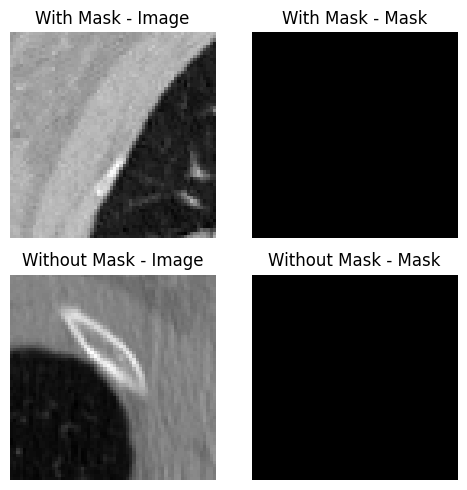

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import random

def plot_example(with_mask_dir, without_mask_dir):
    """Plot one example from each folder: with_mask and without_mask."""
    # Get a random image and mask from the with_mask folder
    with_mask_image_files = sorted(glob.glob(os.path.join(with_mask_dir, 'image', '*.npy')))
    with_mask_mask_files = sorted(glob.glob(os.path.join(with_mask_dir, 'label', '*.npy')))

    without_mask_image_files = sorted(glob.glob(os.path.join(without_mask_dir, 'image', '*.npy')))
    without_mask_mask_files = sorted(glob.glob(os.path.join(without_mask_dir, 'label', '*.npy')))

    if not with_mask_image_files or not without_mask_image_files:
        print("Ensure both 'with_mask' and 'without_mask' folders have data!")
        return

    # Select a random example
    with_mask_idx = random.randint(0, len(with_mask_image_files) - 1)
    without_mask_idx = random.randint(0, len(without_mask_image_files) - 1)

    # Load the images and masks
    with_mask_image = np.load(with_mask_image_files[with_mask_idx])
    with_mask_mask = np.load(with_mask_mask_files[with_mask_idx])

    without_mask_image = np.load(without_mask_image_files[without_mask_idx])
    without_mask_mask = np.load(without_mask_mask_files[without_mask_idx])

    # Check if the masks contain any non-zero values
    print("Checking masks...")
    if np.any(with_mask_mask != 0):
        print("The mask from 'with_mask' folder contains values other than 0.")
    else:
        print("The mask from 'with_mask' folder contains only 0.")

    if np.any(without_mask_mask != 0):
        print("The mask from 'without_mask' folder contains values other than 0.")
    else:
        print("The mask from 'without_mask' folder contains only 0.")

    # Plot examples
    fig, axes = plt.subplots(2, 2, figsize=(5, 5))

    # With mask example
    axes[0, 0].imshow(with_mask_image[..., 0], cmap='gray')
    axes[0, 0].set_title("With Mask - Image")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(with_mask_mask[..., 0], cmap='gray', vmin=0, vmax=1)
    axes[0, 1].set_title("With Mask - Mask")
    axes[0, 1].axis("off")

    # Without mask example
    axes[1, 0].imshow(without_mask_image[..., 0], cmap='gray')
    axes[1, 0].set_title("Without Mask - Image")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(without_mask_mask[..., 0], cmap='gray', vmin=0, vmax=1)
    axes[1, 1].set_title("Without Mask - Mask")
    axes[1, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Directories
WITH_MASK_DIR = '/content/processed_patches/with_mask'
WITHOUT_MASK_DIR = '/content/processed_patches/without_mask'

# Plot examples
plot_example(WITH_MASK_DIR, WITHOUT_MASK_DIR)


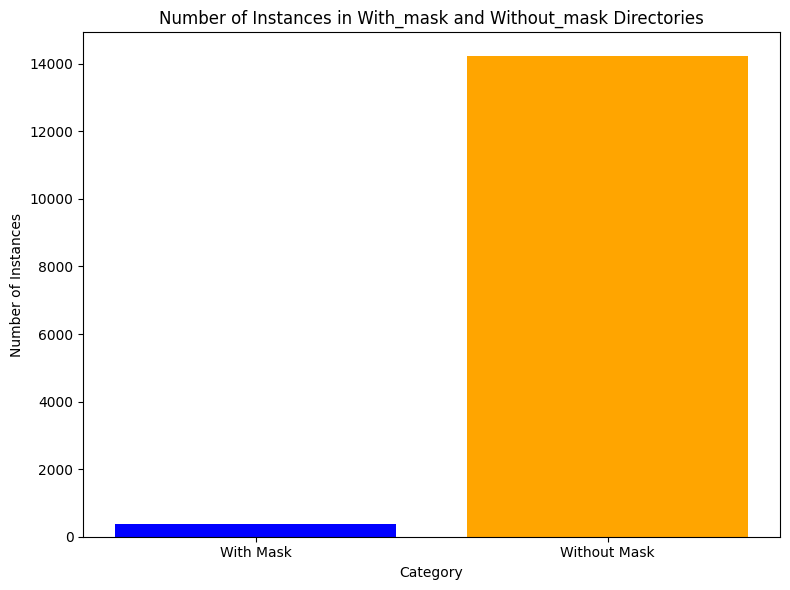

In [ ]:
# Count the number of image/mask instances in the directories
with_mask_image_files = glob.glob(os.path.join(WITH_MASK_DIR, 'image', '*.npy'))
with_mask_mask_files = glob.glob(os.path.join(WITH_MASK_DIR, 'label', '*.npy'))

without_mask_image_files = glob.glob(os.path.join(WITHOUT_MASK_DIR, 'image', '*.npy'))
without_mask_mask_files = glob.glob(os.path.join(WITHOUT_MASK_DIR, 'label', '*.npy'))

with_mask_count = min(len(with_mask_image_files), len(with_mask_mask_files))
without_mask_count = min(len(without_mask_image_files), len(without_mask_mask_files))

# Plot bar chart with the counts
plt.figure(figsize=(8, 6))
plt.bar(['With Mask', 'Without Mask'], [with_mask_count, without_mask_count], color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in With_mask and Without_mask Directories')
plt.tight_layout()
plt.show()

# DataGenerator

In [ ]:
# from tensorflow.keras.utils import Sequence


# # Set the backbone and preprocessing function
# BACKBONE = 'vgg16'
# preprocess_input = sm.get_preprocessing(BACKBONE)

# class MaskDataGenerator(Sequence):
#     def __init__(self,
#                  batch_size=32,
#                  shuffle=True):
#         """
#         Data Generator to return equal number of images with and without mask
#         from WITH_MASK_DIR and WITHOUT_MASK_DIR
#         """

#         # Get paths for images and masks in each directory
#         self.with_mask_images = glob.glob(os.path.join(WITH_MASK_DIR, 'image', '*.npy'))
#         self.with_mask_masks = glob.glob(os.path.join(WITH_MASK_DIR, 'mask', '*.npy'))

#         self.without_mask_images = glob.glob(os.path.join(WITHOUT_MASK_DIR, 'image', '*.npy'))
#         self.without_mask_masks = glob.glob(os.path.join(WITHOUT_MASK_DIR, 'mask', '*.npy'))

#         # Shuffle indexes for randomness
#         self.shuffle = shuffle
#         self.batch_size = batch_size
#         self.on_epoch_end()

#     def on_epoch_end(self):
#         """Shuffle indexes at epoch end if shuffle is True"""
#         if self.shuffle:
#             # Shuffle indices for with_mask and without_mask
#             random.shuffle(self.with_mask_images)
#             random.shuffle(self.without_mask_images)

#     def __data_generation(self, with_mask_paths, without_mask_paths):
#         """Generates data containing batch_size samples with provided paths"""

#         # Initialize data arrays
#         X = np.zeros((self.batch_size, 64, 64, 64, 3), dtype=np.float32)  # (batch_size, 64, 64, 64, 3)
#         y = np.zeros((self.batch_size, 64, 64, 64, 1), dtype=np.float32)  # (batch_size, 64, 64, 64, 1)

#         # Load and preprocess data for with-mask examples
#         for i, img_path in enumerate(with_mask_paths):
#             # Normalize input image using preprocess_input
#             img_data = np.load(img_path).astype(np.float32) / 255.0  # Normalize to [0, 1]
#             X[i] = preprocess_input(img_data)  # Apply normalization tailored to the 'vgg16' backbone

#             # Load corresponding mask
#             mask_path = img_path.replace("image", "mask")
#             if os.path.exists(mask_path):
#                 y[i] = np.load(mask_path).astype(np.float32) / 255.0  # Normalize mask

#         # Load data for without-mask examples
#         for j, img_path in enumerate(without_mask_paths):
#             idx = j + len(with_mask_paths)
#             img_data = np.load(img_path).astype(np.float32) / 255.0
#             X[idx] = preprocess_input(img_data)  # Apply preprocessing for normalization

#         return X, y

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import Sequence
import glob
import os


# Directories CHANGE LATER FOR THAT FROM ZIP FILE
WITH_MASK_DIR = '/content/processed_patches/with_mask'
WITHOUT_MASK_DIR = '/content/processed_patches/without_mask'


class MaskDataGenerator(Sequence):
    def __init__(self,
                 batch_size=4,
                 shuffle=True):
        """
        Data Generator to return equal number of images with and without mask
        from WITH_MASK_DIR and WITHOUT_MASK_DIR
        """

        # Get paths for images and masks in each directory
        self.with_mask_images = glob.glob(os.path.join(WITH_MASK_DIR, 'image', '*.npy'))
        self.with_mask_masks = glob.glob(os.path.join(WITH_MASK_DIR, 'mask', '*.npy'))

        self.without_mask_images = glob.glob(os.path.join(WITHOUT_MASK_DIR, 'image', '*.npy'))
        self.without_mask_masks = glob.glob(os.path.join(WITHOUT_MASK_DIR, 'mask', '*.npy'))

        # Shuffle indexes for randomness
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.on_epoch_end()

    def on_epoch_end(self):
        """Shuffle indexes at epoch end if shuffle is True"""
        if self.shuffle:
            # Shuffle indices for with_mask and without_mask
            random.shuffle(self.with_mask_images)
            random.shuffle(self.without_mask_images)

    def __len__(self):
        """Denotes the number of batches per epoch"""
        # Number of batches depends on the number of images with masks
        return int(np.floor(len(self.with_mask_images) / (self.batch_size / 2)))

    def __data_generation(self, with_mask_paths, without_mask_paths):
        """Generates data containing batch_size samples with provided paths"""

        # Initialize data arrays
        X = np.zeros((self.batch_size, 64, 64, 64, 3), dtype=np.float32)  # (batch_size, 64, 64, 64, 3)
        y = np.zeros((self.batch_size, 64, 64, 64, 1), dtype=np.float32)  # (batch_size, 64, 64, 64, 1)

        # Load data for with-mask examples
        for i, img_path in enumerate(with_mask_paths):
            # Normalize input image
            X[i] = np.stack((np.load(img_path).astype(np.float32) / 255.0,)*3, axis=-1)  # Normalize to [0, 1]

            # Load corresponding mask
            mask_path = img_path.replace("image", "label")  # Fixed path replacement logic

            if os.path.exists(mask_path):
                mask = np.load(mask_path).astype(np.float32)  # Load mask
                y[i] = np.expand_dims(mask, axis=-1)  # Expand mask dimension to match expected shape

            #     # Check if mask contains any labels
            #     if np.any(mask):
            #         print(f"Mask at index {i} contains labels.")
            #     else:
            #         print(f"Mask at index {i} does NOT contain any labels.")
            # else:
            #     print(f"Could not find mask at: {mask_path}")


        # Load data for without-mask examples
        for j, img_path in enumerate(without_mask_paths):
            idx = j + len(with_mask_paths)
            # X[idx] = np.load(img_path).astype(np.float32) / 255.0  # Normalize to [0, 1]
            X[idx] = np.stack((np.load(img_path).astype(np.float32) / 255.0,)*3, axis=-1)  # Normalize to [0, 1]

        return X, y

    def __getitem__(self, index):
        """
        Custom batch generation logic
        Ensure equal number of 'with_mask' and 'without_mask' in each batch
        """

        # Calculate half batch size
        half_batch = self.batch_size // 2

        # Select `with mask` instances
        with_mask_indices = np.arange(index * half_batch, (index + 1) * half_batch)

        # Randomly select images without mask
        without_mask_indices = random.sample(range(len(self.without_mask_images)), half_batch)

        # Build batch paths
        with_mask_paths = [self.with_mask_images[idx] for idx in with_mask_indices]
        without_mask_paths = [self.without_mask_images[idx] for idx in without_mask_indices]

        # Generate data and return
        X, y = self.__data_generation(with_mask_paths, without_mask_paths)
        return X, y


In [ ]:
generator = MaskDataGenerator(
    batch_size=4,
    shuffle=True,
)

generator

In [ ]:
# Testing a batch from the generator
images, labels = generator[0]
print("Batch images shape:", images.shape)
print("Batch labels shape:", labels.shape)

# Compute the sum of masked pixels for each mask in the batch
mask_sums = np.sum(labels, axis=(1, 2, 3, 4))  # Sum over the 3D space (64x64x64) for each batch sample

# Print the sum of masked pixels for each mask
for idx, mask_sum in enumerate(mask_sums):
    print(f"Mask {idx}: Sum of masked pixels = {mask_sum}")


Batch images shape: (4, 64, 64, 64, 3)
Batch labels shape: (4, 64, 64, 64, 1)
Mask 0: Sum of masked pixels = 695.0
Mask 1: Sum of masked pixels = 546.0
Mask 2: Sum of masked pixels = 0.0
Mask 3: Sum of masked pixels = 0.0


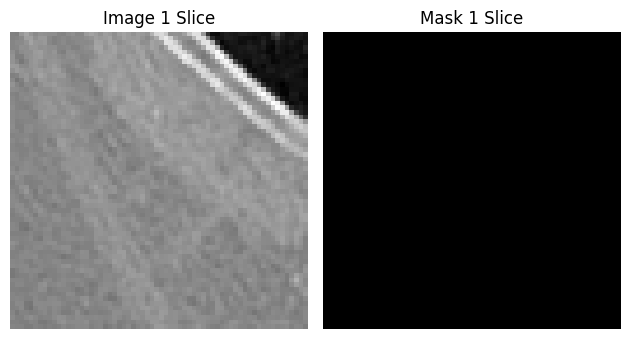

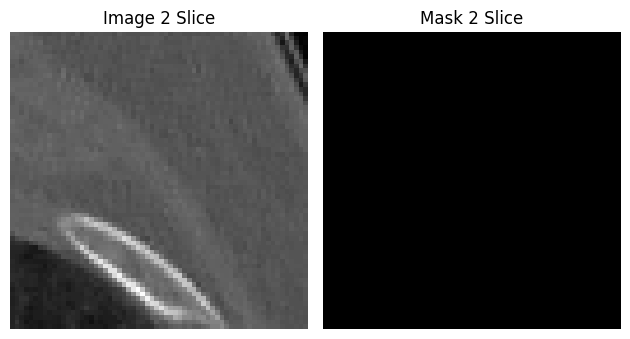

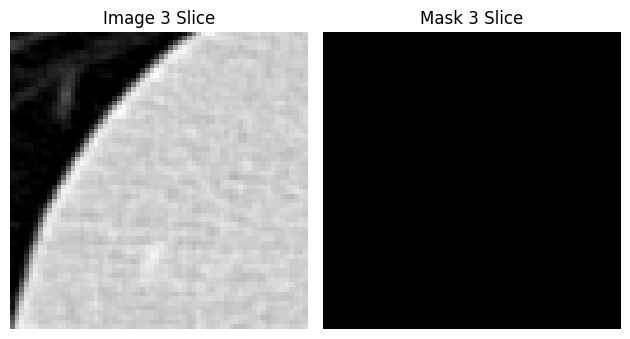

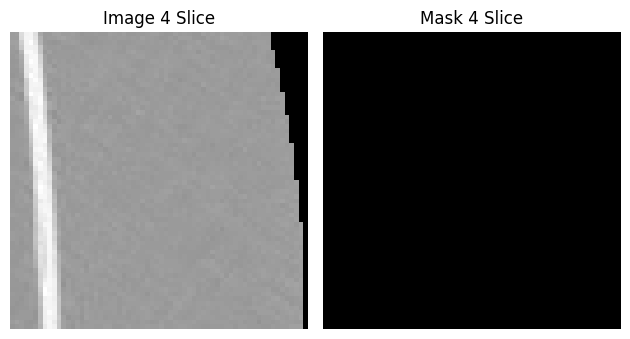

In [ ]:
def plot_batch_slices(images, masks, slice_idx=None):
    """
    Plots slices from all images and their corresponding masks in the batch.

    Args:
        images: Batch of 3D images with shape (batch_size, height, width, depth, 3)
        masks: Batch of masks with shape (batch_size, height, width, depth, 1)
        slice_idx: Index of the slice to visualize
    """
    # Default to the middle slice if none is specified
    if slice_idx is None:
        slice_idx = images.shape[2] // 2  # Middle depth slice

    num_images = images.shape[0]

    for i in range(num_images):
        image_slice = images[i, :, :, slice_idx, 0]  # Taking only the first channel
        mask_slice = masks[i, :, :, slice_idx, 0]

        fig, ax = plt.subplots(1, 2)

        ax[0].imshow(image_slice, cmap='gray')
        ax[0].axis('off')
        ax[0].set_title(f"Image {i+1} Slice")

        ax[1].imshow(mask_slice * 255, cmap='gray')
        ax[1].axis('off')
        ax[1].set_title(f"Mask {i+1} Slice")

        plt.tight_layout()
        plt.show()


plot_batch_slices(images, labels)  # Visualize slices for the entire batch

In [ ]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np


def plot_single_image_slice(slice_idx):
    """
    Plots slices from the first image-mask pair at the provided z-index.

    Args:
        slice_idx: Index of the slice to visualize along the z-axis.
    """
    # Extract the slice from the first image-mask pair
    idx = 1
    image_slice = images[idx, :, :, slice_idx, 0]
    mask_slice = labels[idx, :, :, slice_idx, 0]

    # Plotting the slices
    fig, ax = plt.subplots(1, 2,)

    ax[0].imshow(image_slice, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(f"Image Slice at z={slice_idx}")

    ax[1].imshow(mask_slice * 255, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title(f"Mask Slice at z={slice_idx}")

    plt.tight_layout()
    plt.show()


# Interactive slider over z-index range
interact(plot_single_image_slice, slice_idx=(0, images.shape[2] - 1))

interactive(children=(IntSlider(value=31, description='slice_idx', max=63), Output()), _dom_classes=('widget-i…

<function __main__.plot_single_image_slice(slice_idx)>

# Model

In [ ]:
# Define parameters for model
encoder_weights = 'imagenet'  # try 'coco' as well
BACKBONE = 'vgg16'
activation = 'sigmoid'
patch_size = 64
n_classes = 2
channels = 3

LR = 0.0001
optim = keras.optimizers.Adam(LR)

dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.3, 0.7]))
# focal_loss = sm.losses.BinaryFocalCrossentropy()
focal_loss = sm.losses.binary_focal_loss
total_loss = dice_loss + (1 * focal_loss)

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [ ]:
# preprocess_input = sm.get_preprocessing(BACKBONE)

In [ ]:
# X_train = preprocess_input(train_img[0].astype(np.float32) / 255.0)

In [ ]:
model = sm.Unet(BACKBONE, classes=n_classes,
                input_shape=(patch_size, patch_size, patch_size, channels),
                encoder_weights=encoder_weights,
                activation=activation)

model.compile(optimizer=optim, loss=total_loss, metrics=metrics)
# print(model.summary())

In [ ]:
train_generator = MaskDataGenerator(batch_size=4)

# Inspect one batch
X_batch, y_batch = train_generator[0]  # Fetch the first batch
print("X_batch shape:", X_batch.shape)
print("y_batch shape:", y_batch.shape)

X_batch shape: (4, 64, 64, 64, 3)
y_batch shape: (4, 64, 64, 64, 1)


In [ ]:
# Train the model
history = model.fit(
    x=train_generator,
    # validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    # validation_steps=len(val_generator),
    epochs=30,
    verbose=1
)

Epoch 1/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 167s 895ms/step - f1-score: 0.2805 - iou_score: 0.1818 - loss: 0.8770
Epoch 2/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - f1-score: 0.0000e+00 - iou_score: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 166s 892ms/step - f1-score: 0.2985 - iou_score: 0.1981 - loss: 0.8680
Epoch 4/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - f1-score: 0.0000e+00 - iou_score: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 202s 895ms/step - f1-score: 0.3446 - iou_score: 0.2303 - loss: 0.8469
Epoch 6/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - f1-score: 0.0000e+00 - iou_score: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 166s 892ms/step - f1-score: 0.3150 - iou_score: 0.2137 - loss: 0.8596
Epoch 8/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - f1-score: 0.0000e+00 - iou_score: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
 89/186 ━━━━━━━━━━━━━━━━━━━━ 1:26 891ms/step - f1-score: 0.2760 - iou_sc

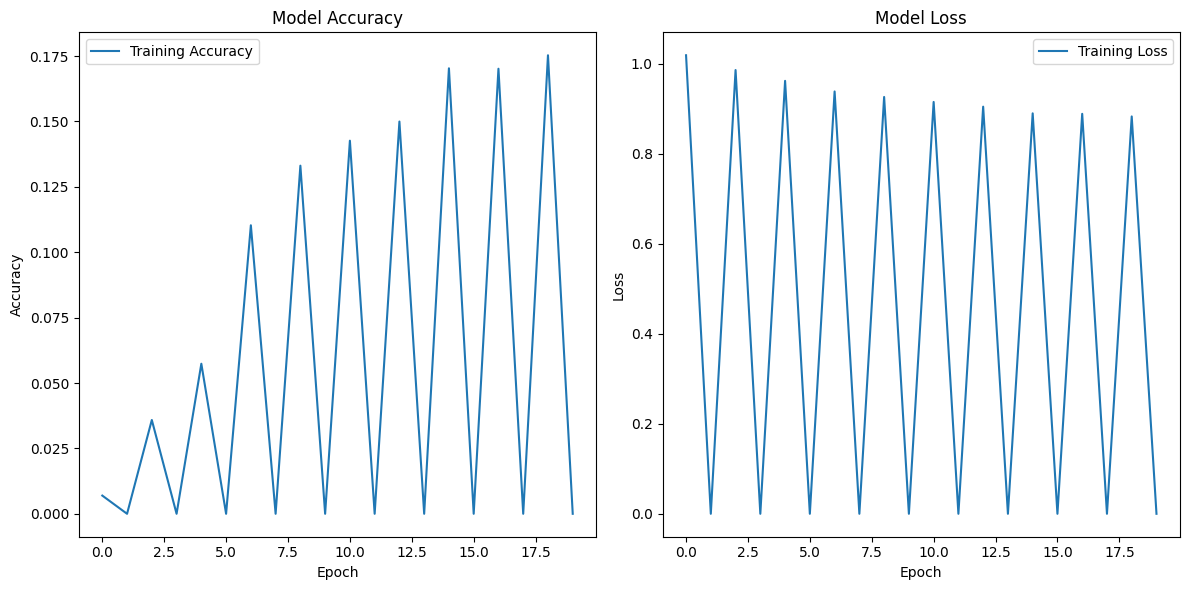

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['iou_score'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Saving model

In [ ]:
from google.colab import files

# Save the model
model.save('my_model.h5')  # Save model in HDF5 format

# Trigger the download
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Save the model using the recommended Keras format
model.save('my_model.keras')  # Save model in the new format

# Trigger the download
files.download('my_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting on TRAIN data

In [ ]:
# # Load the .npy files as NumPy arrays
# test_image = np.load('/content/sample_data/images/processed_images/RibFrac460-image.npy')
# test_mask = np.load('/content/sample_data/labels/processed_labels/RibFrac460-label.npy')


# test_img_patches = patchify(test_image, (64, 64, 64), step=64)
# test_mask_patches = patchify(test_mask, (64, 64, 64), step=64)

# test_input_img = np.reshape(test_img_patches, (-1, test_img_patches.shape[3], test_img_patches.shape[4], test_img_patches.shape[5]))
# test_input_mask = np.reshape(test_mask_patches, (-1, test_mask_patches.shape[3], test_mask_patches.shape[4], test_mask_patches.shape[5]))

# test_img = np.stack((test_input_img,)*3, axis=-1)
# test_mask = np.expand_dims(test_input_mask, axis=4)

# test_img.shape, test_mask.shape

((448, 64, 64, 64, 3), (448, 64, 64, 64, 1))

## Test generator

In [ ]:
# class TestGenerator(Sequence):
#     def __init__(self, test_images, test_masks, batch_size=4):
#         """
#         Data Generator for test images and masks.

#         Args:
#             test_images (numpy.ndarray): Array of test images of shape (N, 64, 64, 64, 3).
#             test_masks (numpy.ndarray): Array of test masks of shape (N, 64, 64, 64, 1).
#             batch_size (int): Number of samples per batch.
#         """
#         self.test_images = test_images
#         self.test_masks = test_masks
#         self.batch_size = batch_size
#         self.indexes = np.arange(len(self.test_images))

#     def __len__(self):
#         """Denotes the number of batches per epoch"""
#         return int(np.ceil(len(self.test_images) / self.batch_size))

#     def __getitem__(self, index):
#         """
#         Generate one batch of data.

#         Args:
#             index (int): Index of the batch.

#         Returns:
#             tuple: Batch of images and masks.
#         """
#         start_idx = index * self.batch_size
#         end_idx = (index + 1) * self.batch_size
#         batch_indices = self.indexes[start_idx:end_idx]

#         batch_images = self.test_images[batch_indices]
#         batch_masks = self.test_masks[batch_indices]

#         return batch_images, batch_masks


# # Initialize test generator
# test_generator = TestGenerator(test_images=test_img, test_masks=test_mask, batch_size=4)

# # Example: Get the first batch
# batch_images, batch_masks = test_generator[0]
# print(batch_images.shape, batch_masks.shape)

(4, 64, 64, 64, 3) (4, 64, 64, 64, 1)


In [ ]:
# # Compute the sum of masked pixels for each mask in the batch
# mask_sums = np.sum(batch_masks, axis=(1, 2, 3, 4))  # Sum over the 3D space (64x64x64) for each batch sample

# # Print the sum of masked pixels for each mask
# for idx, mask_sum in enumerate(mask_sums):
#     print(f"Mask {idx}: Sum of masked pixels = {mask_sum}")


Mask 0: Sum of masked pixels = 0
Mask 1: Sum of masked pixels = 0
Mask 2: Sum of masked pixels = 0
Mask 3: Sum of masked pixels = 0


In [ ]:
images, labels = generator[1]
print(images.shape, labels.shape)

# Compute the sum of masked pixels for each mask in the batch
mask_sums = np.sum(labels, axis=(1, 2, 3, 4))  # Sum over the 3D space (64x64x64) for each batch sample

# Print the sum of masked pixels for each mask
for idx, mask_sum in enumerate(mask_sums):
    print(f"Mask {idx}: Sum of masked pixels = {mask_sum}")

(4, 64, 64, 64, 3) (4, 64, 64, 64, 1)
Mask 0: Sum of masked pixels = 2104.0
Mask 1: Sum of masked pixels = 8058.0
Mask 2: Sum of masked pixels = 0.0
Mask 3: Sum of masked pixels = 0.0


In [ ]:
predictions = model.predict(images, batch_size=4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
predictions.shape

(4, 64, 64, 64, 2)

In [ ]:
# Convert probabilities to class labels (0 or 1)
binary_predictions = np.argmax(predictions, axis=-1)

np.unique(binary_predictions[0])

array([0, 1])

In [ ]:
def plot_image_masks_and_predicted_mask(image_idx, slice_idx):
    """
    Visualizes the input image, actual mask, and predicted mask slices along the z-axis.

    Args:
        image_idx: Index of the image-mask pair to visualize.
        slice_idx: Index of the slice along the z-axis to visualize.
    """
    # Extract slices
    image_slice = images[image_idx, :, :, slice_idx, 0]  # Input image slice
    actual_mask_slice = labels[image_idx, :, :, slice_idx, 0]  # Ground truth mask slice
    predicted_mask_slice = np.argmax(predictions[image_idx, :, :, slice_idx], axis=-1)  # Predicted mask slice

    # Plotting the slices
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the input image
    ax[0].imshow(image_slice, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(f"Image Slice (z={slice_idx})")

    # Plot the ground truth mask
    ax[1].imshow(actual_mask_slice, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title(f"Actual Mask (z={slice_idx})")

    # Plot the predicted mask
    ax[2].imshow(predicted_mask_slice, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title(f"Predicted Mask (z={slice_idx})")

    plt.tight_layout()
    plt.show()


# Interactive sliders for image and slice indices
interact(plot_image_masks_and_predicted_mask,
         image_idx=(0, images.shape[0] - 1),
         slice_idx=(0, images.shape[3] - 1))


interactive(children=(IntSlider(value=1, description='image_idx', max=3), IntSlider(value=31, description='sli…

<function __main__.plot_image_masks_and_predicted_mask(image_idx, slice_idx)>

# Predicting the whole image

In [ ]:
# Load the .npy files as NumPy arrays
test_image = np.load('/content/sample_data/images/processed_images/RibFrac460-image.npy')
test_mask = np.load('/content/sample_data/labels/processed_labels/RibFrac460-label.npy')


test_img_patches = patchify(test_image, (64, 64, 64), step=64)
test_mask_patches = patchify(test_mask, (64, 64, 64), step=64)

test_input_img = np.reshape(test_img_patches, (-1, test_img_patches.shape[3], test_img_patches.shape[4], test_img_patches.shape[5]))
test_input_mask = np.reshape(test_mask_patches, (-1, test_mask_patches.shape[3], test_mask_patches.shape[4], test_mask_patches.shape[5]))

test_img = np.stack((test_input_img,)*3, axis=-1)
test_mask = np.expand_dims(test_input_mask, axis=4)

test_img.shape, test_mask.shape

((448, 64, 64, 64, 3), (448, 64, 64, 64, 1))

In [ ]:
predictions = model.predict(test_img, batch_size=4)

# Convert predictions to binary (if required, based on your model output)
binary_predictions = np.argmax(predictions, axis=-1)

binary_predictions.shape

112/112 ━━━━━━━━━━━━━━━━━━━━ 37s 331ms/step


(448, 64, 64, 64)

In [ ]:
# Reshape the predicted patches back to the original patch format
predicted_patches = binary_predictions.reshape(
    test_img_patches.shape[:3] + (64, 64, 64)
)

predicted_patches.shape

(8, 8, 7, 64, 64, 64)

In [ ]:
# Stitch the patches back together to form the full image
predicted_mask = unpatchify(predicted_patches, test_image.shape)
# test_mask = unpatchify(predicted_patches, test_image.shape)

predicted_mask.shape

(512, 512, 448)

In [ ]:
def visualize_results(slice_idx):
    """
    Visualize a specific z-slice of the original image, ground truth mask, and predicted mask.

    Args:
        slice_idx: Index of the slice along the z-axis to visualize.
    """
    # Extract slices
    image_slice = test_image[:, :, slice_idx]  # Shape: (H, W)
    # ground_truth_slice = test_mask[:, :, slice_idx]  # Shape: (H, W)
    predicted_slice = predicted_mask[:, :, slice_idx]  # Shape: (H, W)

    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(image_slice, cmap='gray')
    ax[0].set_title(f"Original Image Slice {slice_idx}")
    ax[0].axis('off')

    # ax[1].imshow(ground_truth_slice, cmap='gray')
    # ax[1].set_title(f"Ground Truth Mask Slice {slice_idx}")
    # ax[1].axis('off')

    ax[2].imshow(predicted_slice, cmap='gray')
    ax[2].set_title(f"Predicted Mask Slice {slice_idx}")
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()


# Interactive slider over the z-index range
from ipywidgets import interact
interact(visualize_results, slice_idx=(0, test_image.shape[2] - 1))

interactive(children=(IntSlider(value=223, description='slice_idx', max=447), Output()), _dom_classes=('widget…

<function __main__.visualize_results(slice_idx)>

# Using pretrained model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/sample_data/my_model.h5')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,420,950 (43.57 MB)

 Trainable params: 11,415,828 (43.55 MB)

 Non-trainable params: 5,120 (20.00 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
images, labels = generator[1]
print(images.shape, labels.shape)

# Compute the sum of masked pixels for each mask in the batch
mask_sums = np.sum(labels, axis=(1, 2, 3, 4))  # Sum over the 3D space (64x64x64) for each batch sample

# Print the sum of masked pixels for each mask
for idx, mask_sum in enumerate(mask_sums):
    print(f"Mask {idx}: Sum of masked pixels = {mask_sum}")

(4, 64, 64, 64, 3) (4, 64, 64, 64, 1)
Mask 0: Sum of masked pixels = 25357.0
Mask 1: Sum of masked pixels = 1780.0
Mask 2: Sum of masked pixels = 0.0
Mask 3: Sum of masked pixels = 0.0


In [ ]:
predictions = model.predict(images, batch_size=4)

# Convert probabilities to class labels (0 or 1)
binary_predictions = np.argmax(predictions, axis=-1)

np.unique(binary_predictions[0])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(4, 64, 64, 64, 3), dtype=float32). Expected shape (None, 128, 128, 1), but input has incompatible shape (4, 64, 64, 64, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(4, 64, 64, 64, 3), dtype=float32)
  • training=False
  • mask=None